In [27]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

# Chest X-Ray Pneumonia Prediction

(1858, 2090)

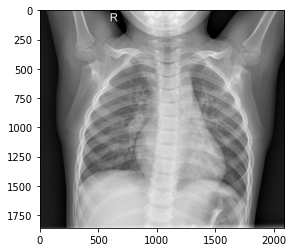

In [28]:
# Sample normal image
path = '../data/chest_pneumonia/train/normal'
img = cv2.imread(path + '/IM-0115-0001.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img, cmap='gray')
img.shape

In [29]:
# Basic info of the image
print('Image size:', img.shape)
print('Image data type:', img.dtype)

Image size: (1858, 2090)
Image data type: uint8


(250, 500)

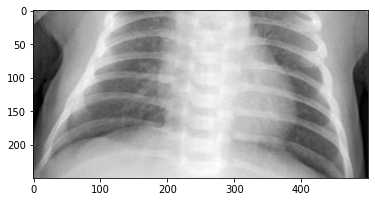

In [30]:
# Sample virus pneumonia image
path = '../data/chest_pneumonia/train/pneumonia'
img2 = cv2.imread(path + '/person281_virus_578.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img2, cmap='gray')
img2.shape

(439, 712)

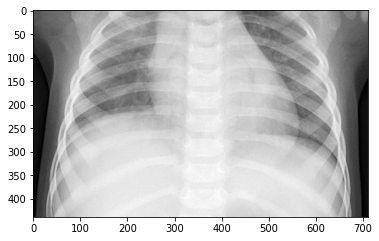

In [31]:
# Sample bacterial pneumonia image
path = '../data/chest_pneumonia/train/pneumonia'
img3 = cv2.imread(path + '/person1_bacteria_1.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img3, cmap='gray')
img3.shape

In [32]:
# Path Stuff
path = '../data/chest_pneumonia'
in_list = os.listdir(path) # This returns a list with all of the elements of the path
in_list

['.DS_Store', 'test', 'training_data.csv', 'train', 'test_data.csv']

## Generating CSVs

In [33]:
# Normal training images

import statistics as stat
sizes = []
shapes = []
rows = []
cols = []
paths = []
labels = []
path_norm = '../data/chest_pneumonia/train/normal'
for i in os.listdir(path_norm):
    image = cv2.imread(path_norm + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_norm + '/' + i)
    labels.append('Healthy')
    rows.append(image.shape[0])
    cols.append(image.shape[1])
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 2338
Largest image: 7532028 pixels, shape: (2663, 2373)
Smallest image: 84681 pixels, shape:  (291, 291)
Mean image size: 1411561 pixels
Median image size: 1486412.0 pixels, shape:  (1062, 1350)


In [34]:
# Pneumonia training images

path_pneu = '../data/chest_pneumonia/train/pneumonia'
for i in os.listdir(path_pneu):
    image = cv2.imread(path_pneu + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_pneu + '/' + i)
    rows.append(image.shape[0])
    cols.append(image.shape[1])
    if 'bact' in i:
        labels.append('Bacterial')
    elif 'vir' in i:
        labels.append('Virus')
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 7217
Largest image: 7532028 pixels, shape: (2663, 2373)
Smallest image: 48768 pixels, shape:  (127, 384)
Mean image size: 1041032 pixels
Median image size: 812928 pixels, shape:  (736, 1070)


In [35]:
train_df = pd.DataFrame({'path': paths, 'shape': shapes, 'rows': rows, 'columns': cols, 'label': labels})
train_df.to_csv('../data/chest_pneumonia/training_data.csv', index=False)

In [36]:
pd.read_csv('../data/chest_pneumonia/training_data.csv')

,path,shape,rows,columns,label
0,../data/chest_pneumonia/train/normal/train_h_a...,"(291, 291)",291,291,Healthy
1,../data/chest_pneumonia/train/normal/NORMAL2-I...,"(2234, 2359)",2234,2359,Healthy
2,../data/chest_pneumonia/train/normal/train_h_a...,"(291, 291)",291,291,Healthy
3,../data/chest_pneumonia/train/normal/train_h_a...,"(291, 291)",291,291,Healthy
4,../data/chest_pneumonia/train/normal/train_h_a...,"(291, 291)",291,291,Healthy
...,...,...,...,...,...
7212,../data/chest_pneumonia/train/pneumonia/train_...,"(291, 291)",291,291,Virus
7213,../data/chest_pneumonia/train/pneumonia/person...,"(712, 1112)",712,1112,Virus
7214,../data/chest_pneumonia/train/pneumonia/person...,"(592, 1000)",592,1000,Virus
7215,../data/chest_pneumonia/train/pneumonia/person...,"(1024, 1584)",1024,1584,Virus


In [37]:
# Normal test images
import statistics as stat
sizes = []
shapes = []
paths = []
labels = []
rows = []
cols = []
path_norm = '../data/chest_pneumonia/test/normal'
for i in os.listdir(path_norm):
    image = cv2.imread(path_norm + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_norm + '/' + i)
    labels.append('Healthy')
    rows.append(image.shape[0])
    cols.append(image.shape[1])
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', int(stat.median(sizes)), 'pixels, shape: ',  sorted(shapes)[int(len(shapes) / 2)])

Total images: 234
Largest image: 6828621 pixels, shape: (2713, 2517)
Smallest image: 488064 pixels, shape:  (496, 984)
Mean image size: 2608497 pixels
Median image size: 2327083 pixels, shape:  (1318, 1754)


In [38]:
# Pneumonia test images

path_pneu = '../data/chest_pneumonia/test/pneumonia'
for i in os.listdir(path_pneu):
    image = cv2.imread(path_pneu + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_pneu + '/' + i)
    rows.append(image.shape[0])
    cols.append(image.shape[1])
    if 'bact' in i:
        labels.append('Bacterial')
    elif 'vir' in i:
        labels.append('Virus')
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 723
Largest image: 6828621 pixels, shape: (2713, 2517)
Smallest image: 84681 pixels, shape:  (291, 291)
Mean image size: 1345048 pixels
Median image size: 958720 pixels, shape:  (808, 1120)


In [39]:
test_df = pd.DataFrame({'path': paths, 'shape': shapes, 'rows': rows, 'columns': cols, 'label': labels})
test_df.to_csv('../data/chest_pneumonia/test_data.csv', index=False)

In [40]:
test_df.tail()

,path,shape,rows,columns,label
718,../data/chest_pneumonia/test/pneumonia/person1...,"(688, 1024)",688,1024,Bacterial
719,../data/chest_pneumonia/test/pneumonia/person1...,"(672, 1088)",672,1088,Bacterial
720,../data/chest_pneumonia/test/pneumonia/person1...,"(808, 1256)",808,1256,Bacterial
721,../data/chest_pneumonia/test/pneumonia/person8...,"(648, 912)",648,912,Bacterial
722,../data/chest_pneumonia/test/pneumonia/person1...,"(640, 952)",640,952,Bacterial


## Counting image type totals

In [41]:
path_pneu = '../data/chest_pneumonia/train/pneumonia'
path_norm = '../data/chest_pneumonia/train/normal'
vir = 0
bact = 0
norm = len(os.listdir(path_norm))
for i in os.listdir(path_pneu):
    if 'vir' in i: 
        vir += 1
    elif 'bact' in i:
        bact += 1
print('Train images:\n')
print('Normal Images:', norm)
print('Virus images:', vir)
print('Bacteria images:', bact)    
print('Total:', norm + vir + bact)   

Train images:

Normal Images: 2338
Virus images: 2341
Bacteria images: 2538
Total: 7217


In the training set, normal images and virus pneumonia images are equated, but bacterial pneumonia images are a lot higher, this can lead to our model being biased, so we will have to augment the normal and virus images to have a similar or equal number of images

In [42]:
path_pneu = '../data/chest_pneumonia/test/pneumonia'
path_norm = '../data/chest_pneumonia/test/normal'
vir = 0
bact = 0
norm = len(os.listdir(path_norm))
for i in os.listdir(path_pneu):
    if 'vir' in i: 
        vir += 1
    elif 'bact' in i:
        bact += 1
print('Test images:\n')
print('Normal Images:', norm)
print('Virus images:', vir)
print('Bacteria images:', bact)
print('Total:', norm + vir + bact)  

Test images:

Normal Images: 234
Virus images: 247
Bacteria images: 242
Total: 723


## Playing with resize function

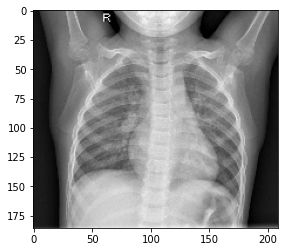

In [43]:
plt.imshow(cv2.resize(img, None,fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC),cmap='gray')

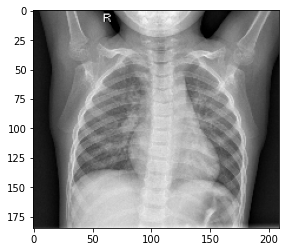

In [50]:
# The same thing
height, width = img.shape[:2]
plt.imshow(cv2.resize(img, (int(0.1*width), int(0.1*height)), interpolation = cv2.INTER_CUBIC),cmap='gray')